In [515]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report ,roc_auc_score,precision_score,recall_score,confusion_matrix,f1_score,accuracy_score,plot_roc_curve
import statsmodels.api as sm
from sklearn.metrics import plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

In [516]:
df_train=pd.read_csv(r'C:\Users\jayac\Downloads\Dataset\train.csv')
df_test=pd.read_csv(r'C:\Users\jayac\Downloads\Dataset\test.csv')

In [517]:
df_train.shape,df_test.shape

((891, 12), (418, 11))

In [518]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [519]:
df_train['Source']='train'
df_test['Source']='test'

In [520]:
df_train[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train


In [521]:
df=pd.concat([df_train,df_test])

In [522]:
df[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train


In [523]:
df.shape

(1309, 13)

In [524]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Source       1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [525]:
df[df.duplicated(['PassengerId'])==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source


In [526]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [527]:
cat1=pd.get_dummies(df['Pclass'],prefix='Class')

In [528]:
df['Name'].nunique()

1307

In [529]:
df[df.duplicated(['Name'])==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source
0,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test
6,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,test


In [530]:
df.loc[df['Name']=='Kelly, Mr. James',:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source
696,697,0.0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S,train
0,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test


In [531]:
df[df['Name'].isin(['Kelly, Mr. James','Connolly, Miss. Kate'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source
289,290,1.0,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q,train
696,697,0.0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S,train
0,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test
6,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,test


In [532]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [533]:
df['Sex'].value_counts()
df[df['Source']=='train'].Sex.value_counts()
df[df['Source']=='test'].Sex.value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [534]:
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
df['Sex']=label.fit_transform(df['Sex'])

In [535]:
df['Sex'].unique()

array([1, 0])

In [536]:
sorted(df['Age'].unique())

[0.83,
 2.0,
 3.0,
 4.0,
 5.0,
 7.0,
 8.0,
 11.0,
 14.0,
 14.5,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 28.5,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 38.0,
 nan,
 0.17,
 0.33,
 0.42,
 0.67,
 0.75,
 0.92,
 1.0,
 6.0,
 9.0,
 10.0,
 11.5,
 12.0,
 13.0,
 18.5,
 20.5,
 22.5,
 23.5,
 24.5,
 26.5,
 30.5,
 32.5,
 34.5,
 36.0,
 36.5,
 37.0,
 38.5,
 39.0,
 40.0,
 40.5,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 45.5,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 55.5,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 60.5,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 70.0,
 70.5,
 71.0,
 74.0,
 76.0,
 80.0]

In [537]:
df['Age'].nunique()

98

In [538]:
df['Age'].isna().sum()

263

In [539]:
df['Age'].sort_values(ascending=False).head(100)

630    80.0
96     76.0
851    74.0
96     71.0
493    71.0
       ... 
434    50.0
218    50.0
355    50.0
482    50.0
177    50.0
Name: Age, Length: 100, dtype: float64

In [540]:
df['Embarked'].mode()
df['Embarked'].fillna('S' ,inplace=True)

In [541]:
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source
5,6,0.0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q,train
17,18,1.0,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,NaN,S,train
19,20,1.0,3,"Masselmani, Mrs. Fatima",0,NaN,0,0,2649,7.2250,NaN,C,train
26,27,0.0,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,7.2250,NaN,C,train
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,330959,7.8792,NaN,Q,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",0,NaN,0,0,334915,7.7208,NaN,Q,test
410,1302,NaN,3,"Naughton, Miss. Hannah",0,NaN,0,0,365237,7.7500,NaN,Q,test
413,1305,NaN,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S,test


In [542]:
df.groupby(['Embarked','Sex']).Age.mean()

Embarked  Sex
C         0      31.224490
          1      33.284386
Q         0      25.458333
          1      31.557692
S         0      28.043571
          1      29.942394
Name: Age, dtype: float64

In [543]:
df['Age'] = df.groupby(['Sex','Embarked']).Age.transform(lambda x: x.fillna(x.mode()[0]))

In [544]:
df['Age'].isna().sum()

0

In [545]:
lst_1_10=[]
lst_10_20=[]
lst_20_40=[]
lst_40_60=[]
lst_60_80=[]
for i in df['Age']:
    if i <= 10 and i not in lst_1_10 and i != np.nan:
        lst_1_10.append(str(i))
    if i > 10 and  i<=20 and i not in lst_10_20 and i != np.nan:
        lst_10_20.append(str(i))
    elif i >20 and i<=40 and i not in lst_20_40 and i != np.nan:
        lst_20_40.append(str(i))
    elif i>40 and i<=60 and i not in lst_40_60 and i != np.nan:
        lst_40_60.append(str(i))
    else:
        lst_60_80.append(str(i))
    

In [546]:
lst1=list(set(lst_1_10))
lst2=list(set(lst_10_20))
lst3=list(set(lst_20_40))
lst4=list(set(lst_40_60))
lst5=list(set(lst_60_80))


In [547]:
lst4

['56.0',
 '42.0',
 '43.0',
 '47.0',
 '46.0',
 '50.0',
 '44.0',
 '52.0',
 '55.0',
 '58.0',
 '45.5',
 '59.0',
 '45.0',
 '48.0',
 '60.0',
 '57.0',
 '54.0',
 '41.0',
 '53.0',
 '51.0',
 '55.5',
 '49.0',
 '40.5']

In [548]:
df['Age']=df['Age'].astype('str')

In [549]:
df['Age']=df['Age'].replace(lst1,'0-10')
df['Age']=df['Age'].replace(lst2,'10-20')
df['Age']=df['Age'].replace(lst3,'21-40')
df['Age']=df['Age'].replace(lst4,'41-60')
df['Age']=df['Age'].replace(lst5,'61-80')

In [550]:
df['Age'].unique()

array(['21-40', '41-60', '0-10', '10-20', '61-80'], dtype=object)

In [551]:
df['Age'].value_counts()

21-40    834
41-60    194
10-20    162
0-10      86
61-80     33
Name: Age, dtype: int64

In [552]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [553]:
df['SibSp'].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [554]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6, 9], dtype=int64)

In [555]:
df['Parch'].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [556]:
df[df['Ticket'].duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source
24,25,0.0,3,"Palsson, Miss. Torborg Danira",0,0-10,3,1,349909,21.0750,NaN,S,train
71,72,0.0,3,"Goodwin, Miss. Lillian Amy",0,10-20,5,2,CA 2144,46.9000,NaN,S,train
88,89,1.0,1,"Fortune, Miss. Mabel Helen",0,21-40,3,2,19950,263.0000,C23 C25 C27,S,train
117,118,0.0,2,"Turpin, Mr. William John Robert",1,21-40,1,0,11668,21.0000,NaN,S,train
119,120,0.0,3,"Andersson, Miss. Ellis Anna Maria",0,0-10,4,2,347082,31.2750,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,1299,NaN,1,"Widener, Mr. George Dunton",1,41-60,1,1,113503,211.5000,C80,C,test
409,1301,NaN,3,"Peacock, Miss. Treasteall",0,0-10,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,test
411,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,21-40,1,0,19928,90.0000,C78,Q,test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,21-40,0,0,PC 17758,108.9000,C105,C,test


In [557]:
df[df['Ticket']=='19950']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source
27,28,0.0,1,"Fortune, Mr. Charles Alexander",1,10-20,3,2,19950,263.0,C23 C25 C27,S,train
88,89,1.0,1,"Fortune, Miss. Mabel Helen",0,21-40,3,2,19950,263.0,C23 C25 C27,S,train
341,342,1.0,1,"Fortune, Miss. Alice Elizabeth",0,21-40,3,2,19950,263.0,C23 C25 C27,S,train
438,439,0.0,1,"Fortune, Mr. Mark",1,61-80,1,4,19950,263.0,C23 C25 C27,S,train
53,945,NaN,1,"Fortune, Miss. Ethel Flora",0,21-40,3,2,19950,263.0,C23 C25 C27,S,test
69,961,NaN,1,"Fortune, Mrs. Mark (Mary McDougald)",0,41-60,1,4,19950,263.0,C23 C25 C27,S,test


In [558]:
df['Fare']= df['Fare'].apply(lambda x : round(x,2))

In [559]:
df['Fare'].nunique()

264

In [560]:
df['Cabin'].nunique()

186

In [561]:
df['Cabin'].isna().sum()

1014

In [562]:
df[df['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source
0,1,0.0,3,"Braund, Mr. Owen Harris",1,21-40,1,0,A/5 21171,7.25,NaN,S,train
2,3,1.0,3,"Heikkinen, Miss. Laina",0,21-40,0,0,STON/O2. 3101282,7.92,NaN,S,train
4,5,0.0,3,"Allen, Mr. William Henry",1,21-40,0,0,373450,8.05,NaN,S,train
5,6,0.0,3,"Moran, Mr. James",1,21-40,0,0,330877,8.46,NaN,Q,train
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,0-10,3,1,349909,21.07,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",0,21-40,0,0,347086,7.78,NaN,S,test
413,1305,NaN,3,"Spector, Mr. Woolf",1,21-40,0,0,A.5. 3236,8.05,NaN,S,test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,21-40,0,0,SOTON/O.Q. 3101262,7.25,NaN,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",1,21-40,0,0,359309,8.05,NaN,S,test


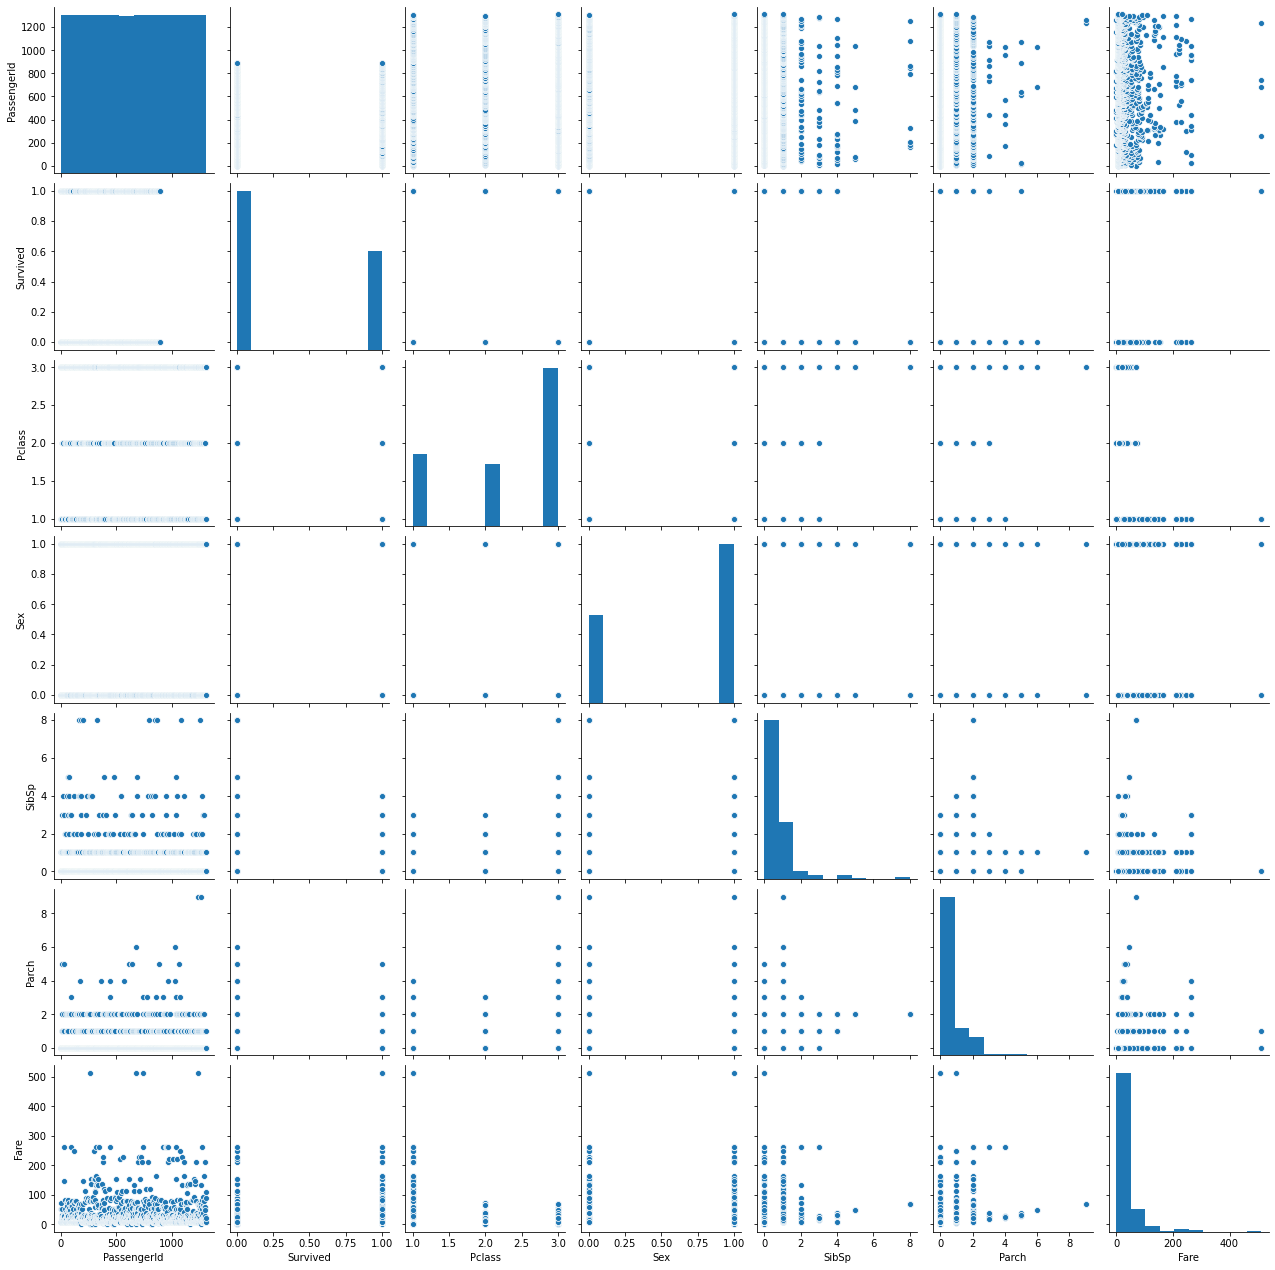

In [563]:
sns.pairplot(df)

In [564]:
df['Cabin'].mode()

0    C23 C25 C27
dtype: object

In [565]:
df.shape

(1309, 13)

In [566]:
#df.drop(columns=['Cabin'],axis=1,inplace=True)

In [567]:
df.shape

(1309, 13)

In [568]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [569]:
df1 = df.groupby(['Fare', 'Cabin']).size().reset_index(name='Freq')


In [570]:
df1=df.groupby(['Fare','Cabin']).size().reset_index(name='Freq')

In [571]:
df[df['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source
152,1044,NaN,3,"Storey, Mr. Thomas",1,61-80,0,0,3701,NaN,NaN,S,test


In [572]:
df['Fare'].mean()

33.2954816513762

In [573]:
df.loc[df['Name']=='Storey, Mr. Thomas',['Fare']]=33.2954816513762

In [574]:
df[df['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source
0,1,0.0,3,"Braund, Mr. Owen Harris",1,21-40,1,0,A/5 21171,7.25,NaN,S,train
2,3,1.0,3,"Heikkinen, Miss. Laina",0,21-40,0,0,STON/O2. 3101282,7.92,NaN,S,train
4,5,0.0,3,"Allen, Mr. William Henry",1,21-40,0,0,373450,8.05,NaN,S,train
5,6,0.0,3,"Moran, Mr. James",1,21-40,0,0,330877,8.46,NaN,Q,train
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,0-10,3,1,349909,21.07,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",0,21-40,0,0,347086,7.78,NaN,S,test
413,1305,NaN,3,"Spector, Mr. Woolf",1,21-40,0,0,A.5. 3236,8.05,NaN,S,test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,21-40,0,0,SOTON/O.Q. 3101262,7.25,NaN,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",1,21-40,0,0,359309,8.05,NaN,S,test


In [575]:
df[(df['Fare']==8.05) & (df['Cabin'].notna())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source
429,430,1.0,3,"Pickard, Mr. Berk (Berk Trembisky)",1,21-40,0,0,SOTON/O.Q. 392078,8.05,E10,S,train


In [576]:
df1=df[df['Cabin'].notna()]

In [577]:
dict={}
for i,j in zip(df1['Fare'],df1['Cabin']):
    if i not in dict:
        dict[i]=j
print(dict)

{71.28: 'C85', 53.1: 'C123', 51.86: 'E46', 16.7: 'G6', 26.55: 'C103', 13.0: 'D56', 35.5: 'A6', 263.0: 'C23 C25 C27', 146.52: 'B78', 76.73: 'D33', 61.98: 'B30', 80.0: 'B28', 83.47: 'C83', 10.5: 'F33', 7.65: 'F G73', 61.17: 'E31', 34.65: 'A5', 63.36: 'D10 D12', 77.29: 'D26', 52.0: 'C110', 247.52: 'B58 B60', 22.36: 'F E69', 26.28: 'D47', 79.2: 'B86', 26.0: 'F2', 66.6: 'C2', 55.0: 'E33', 33.5: 'B19', 30.7: 'A7', 28.71: 'C49', 39.0: 'F4', 50.0: 'A32', 27.72: 'B4', 10.46: 'G6', 31.0: 'A31', 113.28: 'D36', 76.29: 'D15', 90.0: 'C93', 52.55: 'D35', 86.5: 'B77', 79.65: 'E67', 0.0: 'B94', 153.46: 'C125', 135.63: 'C99', 29.7: 'C118', 77.96: 'D7', 91.08: 'B49', 12.88: 'D', 151.55: 'C22 C26', 30.5: 'C106', 12.35: 'E101', 108.9: 'C65', 56.93: 'E36', 83.16: 'C54', 262.38: 'B57 B59 B63 B66', 164.87: 'C7', 134.5: 'E34', 57.98: 'B18', 28.5: 'C124', 35.0: 'C128', 75.25: 'D37', 69.3: 'B35', 55.44: 'E50', 211.5: 'C82', 120.0: 'B96 B98', 8.05: 'E10', 55.9: 'E44', 81.86: 'A34', 27.75: 'C111', 89.1: 'C92', 38.

In [578]:
print(dict)

{71.28: 'C85', 53.1: 'C123', 51.86: 'E46', 16.7: 'G6', 26.55: 'C103', 13.0: 'D56', 35.5: 'A6', 263.0: 'C23 C25 C27', 146.52: 'B78', 76.73: 'D33', 61.98: 'B30', 80.0: 'B28', 83.47: 'C83', 10.5: 'F33', 7.65: 'F G73', 61.17: 'E31', 34.65: 'A5', 63.36: 'D10 D12', 77.29: 'D26', 52.0: 'C110', 247.52: 'B58 B60', 22.36: 'F E69', 26.28: 'D47', 79.2: 'B86', 26.0: 'F2', 66.6: 'C2', 55.0: 'E33', 33.5: 'B19', 30.7: 'A7', 28.71: 'C49', 39.0: 'F4', 50.0: 'A32', 27.72: 'B4', 10.46: 'G6', 31.0: 'A31', 113.28: 'D36', 76.29: 'D15', 90.0: 'C93', 52.55: 'D35', 86.5: 'B77', 79.65: 'E67', 0.0: 'B94', 153.46: 'C125', 135.63: 'C99', 29.7: 'C118', 77.96: 'D7', 91.08: 'B49', 12.88: 'D', 151.55: 'C22 C26', 30.5: 'C106', 12.35: 'E101', 108.9: 'C65', 56.93: 'E36', 83.16: 'C54', 262.38: 'B57 B59 B63 B66', 164.87: 'C7', 134.5: 'E34', 57.98: 'B18', 28.5: 'C124', 35.0: 'C128', 75.25: 'D37', 69.3: 'B35', 55.44: 'E50', 211.5: 'C82', 120.0: 'B96 B98', 8.05: 'E10', 55.9: 'E44', 81.86: 'A34', 27.75: 'C111', 89.1: 'C92', 38.

In [579]:
for i in dict.keys():
    df.loc[df['Fare']==i,['Cabin']]=dict[i]

In [580]:
df.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          668
Embarked         0
Source           0
dtype: int64

In [581]:
df2=df[df['Cabin'].isna()]

In [582]:
a=df2['Fare'].unique()
sorted(a)

[3.17,
 4.01,
 6.24,
 6.44,
 6.45,
 6.5,
 6.75,
 6.86,
 6.95,
 6.97,
 7.0,
 7.05,
 7.12,
 7.14,
 7.22,
 7.25,
 7.28,
 7.31,
 7.5,
 7.52,
 7.55,
 7.58,
 7.63,
 7.72,
 7.73,
 7.74,
 7.78,
 7.79,
 7.8,
 7.82,
 7.83,
 7.85,
 7.88,
 7.89,
 7.9,
 7.92,
 8.03,
 8.11,
 8.14,
 8.16,
 8.3,
 8.36,
 8.4,
 8.43,
 8.46,
 8.52,
 8.65,
 8.66,
 8.68,
 8.71,
 8.85,
 8.96,
 9.0,
 9.22,
 9.32,
 9.35,
 9.47,
 9.48,
 9.5,
 9.59,
 9.69,
 9.82,
 9.84,
 9.85,
 10.17,
 10.52,
 10.71,
 11.13,
 11.24,
 11.5,
 12.0,
 12.18,
 12.28,
 12.29,
 12.53,
 12.65,
 12.74,
 13.42,
 13.5,
 13.78,
 13.9,
 14.0,
 14.11,
 14.4,
 14.45,
 14.46,
 14.5,
 15.0,
 15.03,
 15.1,
 15.25,
 15.5,
 15.55,
 15.58,
 15.74,
 15.75,
 15.85,
 15.9,
 16.0,
 16.1,
 17.4,
 17.8,
 18.0,
 18.75,
 18.79,
 19.26,
 19.5,
 19.97,
 20.21,
 20.25,
 20.52,
 20.57,
 21.0,
 21.07,
 21.68,
 22.02,
 22.52,
 23.0,
 23.25,
 23.45,
 24.0,
 24.15,
 25.47,
 25.74,
 26.25,
 27.0,
 27.45,
 27.9,
 29.0,
 29.12,
 30.07,
 31.27,
 31.39,
 31.5,
 32.5,
 33.0,
 33.2954816

In [583]:
value1=df.loc[df['Fare'] <=10,['Cabin']].mode()
value2=df.loc[(df['Fare'] >10) & (df['Fare']<=20),['Cabin']].mode()
value3=df.loc[(df['Fare'] >30) & (df['Fare']<=40),['Cabin']].mode()
value4=df.loc[(df['Fare'] >40) & (df['Fare']<=50),['Cabin']].mode()
value5=df.loc[(df['Fare'] >50) & (df['Fare']<=60),['Cabin']].mode()
value6=df.loc[(df['Fare'] >60) & (df['Fare']<=70),['Cabin']].mode()
value7=df.loc[(df['Fare'] >70) & (df['Fare']<=80),['Cabin']].mode()
value8=df.loc[(df['Fare'] >80) & (df['Fare']<=90),['Cabin']].mode()
value9=df.loc[(df['Fare'] >120) & (df['Fare']<=140),['Cabin']].mode()
value10=df.loc[(df['Fare'] >20) & (df['Fare']<=30),['Cabin']].mode()
print('value1',value1)
print('value2',value2)
print('value3',value3)
print('value4',value4)
print('value5',value5)
print('value6',value6)
print('value7',value7)
print('value8',value8)
print('value9',value9)
print('value10',value10)

value1   Cabin
0   E10
value2   Cabin
0   D56
value3   Cabin
0    F4
value4   Cabin
0   B39
value5   Cabin
0  C110
value6      Cabin
0      B30
1      B35
2       C2
3  D10 D12
4      E31
value7   Cabin
0   B86
value8   Cabin
0   C54
value9   Cabin
0   E34
value10   Cabin
0    F2


In [584]:
for i in df2['Fare']:
    if i <10:
        df.loc[df['Fare']==i,['Cabin']]= 'E10'
    elif i>10 and i<=20:
        df.loc[df['Fare']==i,['Cabin']]= 'D56'
    elif i >20 and i<=30:
        df.loc[df['Fare']==i,['Cabin']]= 'F2'
    elif i>30 and i<=40:
        df.loc[df['Fare']==i,['Cabin']]= 'F4'
    elif i>40 and i<50:
        df.loc[df['Fare']==i,['Cabin']]= 'B39'
    elif i>50 and i <=60:
        df.loc[df['Fare']==i,['Cabin']]= 'C110'
    elif i>60 and i<=70:
        df.loc[df['Fare']==i,['Cabin']]= 'B30'
    elif i>70 and i<=80:
        df.loc[df['Fare']==i,['Cabin']]= 'B86'
    elif i>80 and i<=90:
        df.loc[df['Fare']==i,['Cabin']]= 'C54'
    elif i>130 and i<=140:
        df.loc[df['Fare']==i,['Cabin']]= 'E34'
    

In [585]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int32  
 5   Age          1309 non-null   object 
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Source       1309 non-null   object 
dtypes: float64(2), int32(1), int64(4), object(6)
memory usage: 178.1+ KB


In [586]:
df.loc[(df['Survived'].isna() )& (df['Source']=='test')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source
0,892,NaN,3,"Kelly, Mr. James",1,21-40,0,0,330911,7.83,E10,Q,test
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",0,41-60,1,0,363272,7.00,E10,S,test
2,894,NaN,2,"Myles, Mr. Thomas Francis",1,61-80,0,0,240276,9.69,E10,Q,test
3,895,NaN,3,"Wirz, Mr. Albert",1,21-40,0,0,315154,8.66,E10,S,test
4,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,21-40,1,1,3101298,12.29,D56,S,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",1,21-40,0,0,A.5. 3236,8.05,E10,S,test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,21-40,0,0,PC 17758,108.90,C65,C,test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,21-40,0,0,SOTON/O.Q. 3101262,7.25,E10,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",1,21-40,0,0,359309,8.05,E10,S,test


In [587]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int32  
 5   Age          1309 non-null   object 
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Source       1309 non-null   object 
dtypes: float64(2), int32(1), int64(4), object(6)
memory usage: 178.1+ KB


In [588]:
cat1=pd.get_dummies(df['Age'],prefix='Age')

In [589]:
df['Cabin'].unique()

array(['E10', 'C85', 'C123', 'E46', 'F2', 'D56', 'F4', 'G6', 'C103', 'A6',
       'C23 C25 C27', 'B4', 'B78', 'F38', 'F33', 'C54', 'C110', 'F E46',
       'B39', 'D33', 'B30', 'C111', 'B28', 'C83', 'B86', 'F G73', 'E121',
       'E31', 'A5', 'D10 D12', 'D26', 'B58 B60', 'F E69', 'D', 'D47',
       'C2', 'E33', 'D17', 'B19', 'A7', 'C49', 'B94', 'A32', 'A31', 'D36',
       'D15', 'C93', 'D35', 'B77', 'B51 B53 B55', 'E67', 'C125', 'C99',
       'C118', 'D7', 'C46', 'B49', 'C22 C26', 'C106', 'E101', 'C70',
       'C65', 'E36', 'B57 B59 B63 B66', 'C7', 'E34', 'B18', 'C124',
       'C128', 'D37', 'B35', 'E50', 'C82', 'C62 C64', 'B96 B98', 'E44',
       'A34', 'C92', 'E63', 'D20', 'E25', 'D46', 'B73', 'C95', 'C86',
       'B22', 'D38', 'A16', 'C101', 'A23', 'A10', 'D50', 'E58', 'B5',
       'B20', 'D28', 'A24', 'B45', 'A29', 'C78', 'C31', 'C53', 'C6',
       'B11', 'C89'], dtype=object)

In [590]:
df['Cabin']=df['Cabin'].apply( lambda x: x[0:1])

In [591]:
df['Cabin'].unique()

array(['E', 'C', 'F', 'D', 'G', 'A', 'B'], dtype=object)

In [592]:
cat2=pd.get_dummies(df['Cabin'],prefix='Cabin')

In [593]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [594]:
cat3=pd.get_dummies(df['Embarked'],prefix='Embarked')

In [595]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [596]:
categorical=df.select_dtypes(exclude=np.number).drop(columns=['Name','Source'])

In [597]:
categorical

,Age,Ticket,Cabin,Embarked
0,21-40,A/5 21171,E,S
1,21-40,PC 17599,C,C
2,21-40,STON/O2. 3101282,E,S
3,21-40,113803,C,S
4,21-40,373450,E,S
...,...,...,...,...
413,21-40,A.5. 3236,E,S
414,21-40,PC 17758,C,C
415,21-40,SOTON/O.Q. 3101262,E,S
416,21-40,359309,E,S


In [598]:
numerical=df.select_dtypes(include=np.number).drop(columns=['PassengerId','Survived'])
numerical

,Pclass,Sex,SibSp,Parch,Fare
0,3,1,1,0,7.25
1,1,0,1,0,71.28
2,3,0,0,0,7.92
3,1,0,1,0,53.10
4,3,1,0,0,8.05
...,...,...,...,...,...
413,3,1,0,0,8.05
414,1,0,0,0,108.90
415,3,1,0,0,7.25
416,3,1,0,0,8.05


In [599]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [600]:
vif=pd.DataFrame()
vif['Feature']=numerical.columns
vif['Data']= [variance_inflation_factor(numerical.values,i) for i in range(len(numerical.columns))]
vif

,Feature,Data
0,Pclass,3.067776
1,Sex,2.703508
2,SibSp,1.464035
3,Parch,1.500572
4,Fare,1.318247


In [601]:
df_final=pd.concat([numerical,categorical,cat1,cat2,cat3,df[['Source','Survived','PassengerId']]],axis=1)

In [602]:
df_final.head(4)

,Pclass,Sex,SibSp,Parch,Fare,Age,Ticket,Cabin,Embarked,Age_0-10,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Embarked_C,Embarked_Q,Embarked_S,Source,Survived,PassengerId
0,3,1,1,0,7.25,21-40,A/5 21171,E,S,0,...,0,1,0,0,0,0,1,train,0.0,1
1,1,0,1,0,71.28,21-40,PC 17599,C,C,0,...,0,0,0,0,1,0,0,train,1.0,2
2,3,0,0,0,7.92,21-40,STON/O2. 3101282,E,S,0,...,0,1,0,0,0,0,1,train,1.0,3
3,1,0,1,0,53.10,21-40,113803,C,S,0,...,0,0,0,0,0,0,1,train,1.0,4


In [603]:
train_preprocessed= df_final[df_final['Source']=='train']
test_preprocessed= df_final[df_final['Source']=='test']

In [604]:
del train_preprocessed['Source']
del test_preprocessed['Source']

In [605]:
train_preprocessed.shape,test_preprocessed.shape

((891, 26), (418, 26))

In [606]:
train_preprocessed.head()

,Pclass,Sex,SibSp,Parch,Fare,Age,Ticket,Cabin,Embarked,Age_0-10,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Embarked_C,Embarked_Q,Embarked_S,Survived,PassengerId
0,3,1,1,0,7.25,21-40,A/5 21171,E,S,0,...,0,0,1,0,0,0,0,1,0.0,1
1,1,0,1,0,71.28,21-40,PC 17599,C,C,0,...,1,0,0,0,0,1,0,0,1.0,2
2,3,0,0,0,7.92,21-40,STON/O2. 3101282,E,S,0,...,0,0,1,0,0,0,0,1,1.0,3
3,1,0,1,0,53.10,21-40,113803,C,S,0,...,1,0,0,0,0,0,0,1,1.0,4
4,3,1,0,0,8.05,21-40,373450,E,S,0,...,0,0,1,0,0,0,0,1,0.0,5


In [607]:
train_x=train_preprocessed.drop(columns=['PassengerId','Survived','Embarked',
                                        'Cabin','Ticket','Age','Fare'])
test_x=test_preprocessed.drop(columns=['PassengerId','Survived','Embarked',
                                        'Cabin','Ticket','Age','Fare'])
train_y=train_preprocessed['Survived']

In [608]:
train_x.shape

(891, 19)

In [609]:
lm=LogisticRegression()

In [610]:
lm.fit(train_x,train_y)
train_pred=lm.predict(train_x)
test_pred=lm.predict(test_x)


In [611]:
def metric_score(actual, pred):
    print('confusion matrix: ', confusion_matrix(actual, pred))
    print('accuracy score: ', accuracy_score(actual, pred))
    print('recall_score: ', recall_score(actual, pred))
    print('precision score: ', precision_score(actual, pred))
    print('f1 score: ', f1_score(actual, pred))
    print('roc auc score: ', roc_auc_score(actual, pred))
    print('classification report : \n', classification_report(actual, pred))

In [612]:
metric_score(train_y, train_pred)

confusion matrix:  [[479  70]
 [ 94 248]]
accuracy score:  0.8159371492704826
recall_score:  0.7251461988304093
precision score:  0.779874213836478
f1 score:  0.7515151515151515
roc auc score:  0.7988208225481737
classification report : 
               precision    recall  f1-score   support

         0.0       0.84      0.87      0.85       549
         1.0       0.78      0.73      0.75       342

    accuracy                           0.82       891
   macro avg       0.81      0.80      0.80       891
weighted avg       0.81      0.82      0.81       891



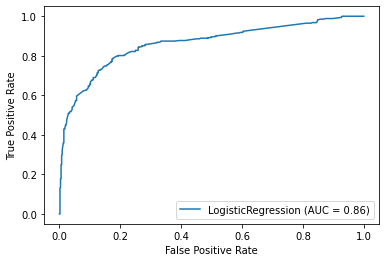

In [613]:
plot_roc_curve(lm, train_x, train_y)

In [614]:
submission=pd.read_csv(r'C:\Users\jayac\Downloads\Dataset\gender_submission.csv')

In [615]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [616]:
submission['Survived']=test_pred

In [617]:
submission.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0


In [618]:
submission['Survived']=submission['Survived'].apply(lambda x : int(x))

In [619]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [620]:
submission.to_csv(r'C:\Users\jayac\Downloads\Dataset\Titanic Disaster Survey Hackathon2.csv',index=False)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\jayac\\Downloads\\Dataset\\Titanic Disaster Survey Hackathon2.csv'

In [ ]:
train_x.corr()

In [622]:
round(lm.score(train_x, train_y) * 100, 2)

81.59